In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score

train_df = pd.read_csv('/kaggle/input/datasetkaggle/train.csv')

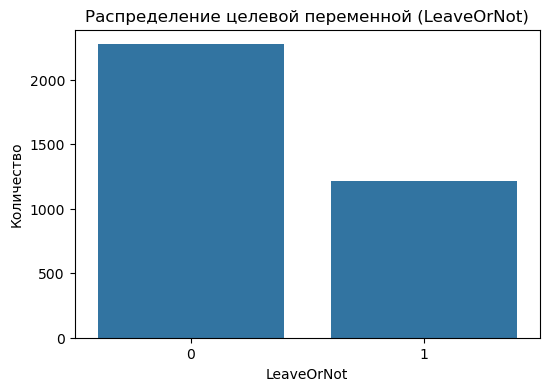

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='LeaveOrNot', data=train_df)
plt.title("Распределение целевой переменной (LeaveOrNot)")
plt.xlabel("LeaveOrNot")
plt.ylabel("Количество")
plt.show()

In [7]:
label_encoder = LabelEncoder()
for column in train_df.columns:
    if train_df[column].dtype == 'object':
        train_df[column] = label_encoder.fit_transform(train_df[column])

In [9]:
scaler = StandardScaler()
numeric_columns = ['JoiningYear', 'Age', 'ExperienceInCurrentDomain']
train_df[numeric_columns] = scaler.fit_transform(train_df[numeric_columns])

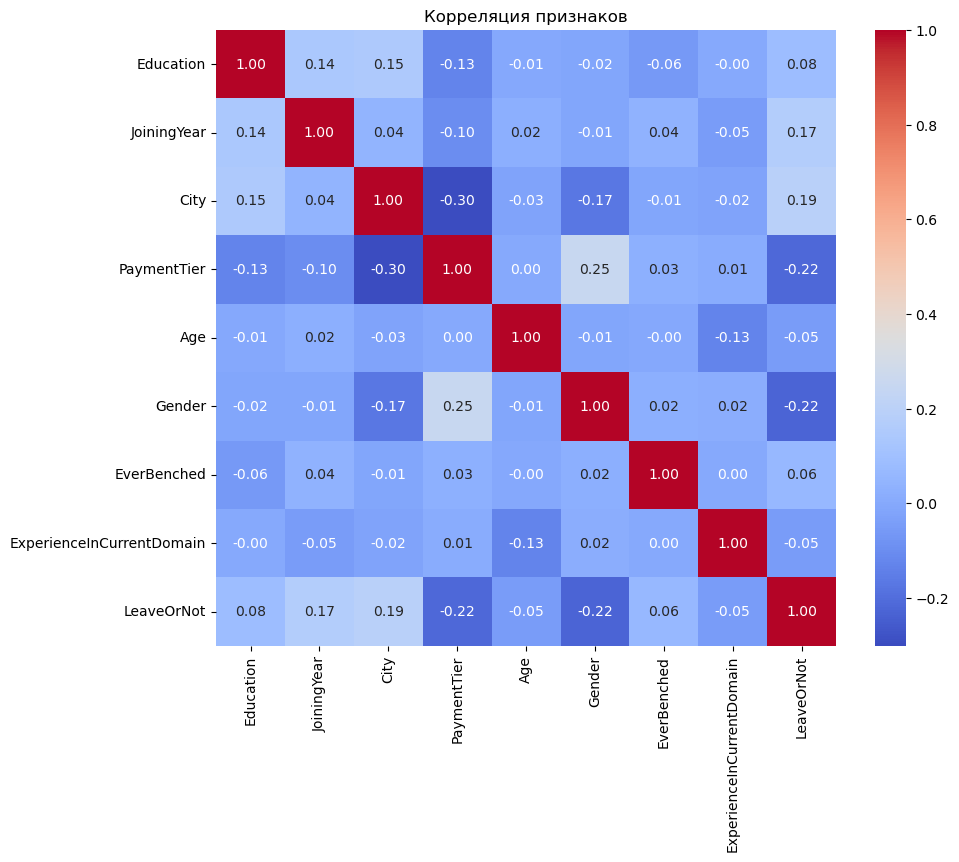

In [11]:
plt.figure(figsize=(10, 8))
corr_matrix = train_df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Корреляция признаков")
plt.show()

In [13]:
X, y = train_df.drop(['LeaveOrNot'], axis=1), train_df['LeaveOrNot']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

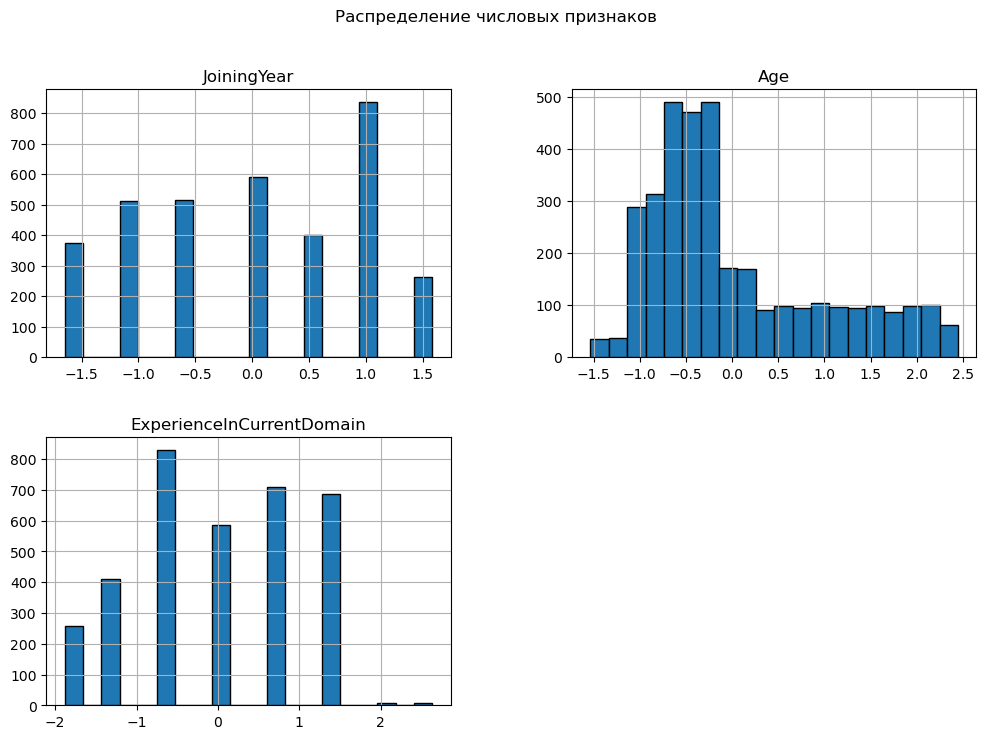

In [17]:
numeric_columns = ['JoiningYear', 'Age', 'ExperienceInCurrentDomain']
train_df[numeric_columns].hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Распределение числовых признаков")
plt.show()

In [19]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
y_val_pred = model.predict(X_val)
print("Accuracy на валидации:", accuracy_score(y_val, y_val_pred))

Accuracy на валидации: 0.8409742120343839


In [13]:
test_df = pd.read_csv('/kaggle/input/datasetkaggle/test.csv')
for column in test_df.columns:
    if test_df[column].dtype == 'object':
        test_df[column] = label_encoder.fit_transform(test_df[column])
test_df[numeric_columns] = scaler.transform(test_df[numeric_columns])

In [14]:
pred = model.predict(test_df)
submission = pd.DataFrame({'ID': list(range(len(pred))), 'LeaveOrNot': pred})
submission.to_csv('submission.csv', index=False)